<a href="https://colab.research.google.com/github/AntropovDaniil/LSTM/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!pip install gdown
!pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 31kB/s 


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=2)
rcParams['figure.figsize'] = 25, 12

RANDOM_SEED = 38
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas.util.testing as tm

In [151]:
from google.colab import files
files.upload()

Saving train_dataset_1.csv to train_dataset_1.csv


{'train_dataset_1.csv': b'"Local Date"," Local Time"," Day Type ID"," Total Carriageway Flow"," Speed Value","Intencity","Volume","Result","Time","","",""\n"2014-01-01","0:00:00","14","42.00","105.43","168.00","1.5934743431661","0","1/1/2014 0:00","","",""\n"2014-01-01","0:15:00","14","59.00","103.26","236.00","2.2854929304668","0","1/1/2014 0:15","","",""\n"2014-01-01","0:30:00","14","79.00","98.71","316.00","3.2012967277885","0","1/1/2014 0:30","","",""\n"2014-01-01","0:45:00","14","124.00","96.59","496.00","5.1351071539497","0","1/1/2014 0:45","","",""\n"2014-01-01","1:00:00","14","151.00","99.45","604.00","6.0734037204625","0","1/1/2014 1:00","","",""\n"2014-01-01","1:15:00","14","132.00","104.07","528.00","5.0735082156241","0","1/1/2014 1:15","","",""\n"2014-01-02","1:30:00","14","178.00","103.91","712.00","6.8520835338274","0","1/2/2014 1:30","","",""\n"2014-01-03","1:45:00","14","109.00","107.36","436.00","4.0611028315946","0","1/3/2014 1:45","","",""\n"2014-01-04","2:00:00","14

In [152]:
!ls

gdrive	sample_data  train_dataset_1.csv  train_dataset.csv


In [0]:
!rm train_dataset.xlsx

In [9]:
!ls

sample_data


In [11]:
files.upload()

Saving train_dataset.csv to train_dataset.csv


{'train_dataset.csv': b'"Local Date"," Local Time"," Day Type ID"," Total Carriageway Flow"," Speed Value","Intencity","Volume","Result","","","",""\n"01,01,2014","0:00:00","14","42.00","105.43","168.00","1.5934743431661","0","","","",""\n"01,01,2014","0:15:00","14","59.00","103.26","236.00","2.2854929304668","0","","","",""\n"01,01,2014","0:30:00","14","79.00","98.71","316.00","3.2012967277885","0","","","",""\n"01,01,2014","0:45:00","14","124.00","96.59","496.00","5.1351071539497","0","","","",""\n"01,01,2014","1:00:00","14","151.00","99.45","604.00","6.0734037204625","0","","","",""\n"01,01,2014","1:15:00","14","132.00","104.07","528.00","5.0735082156241","0","","","",""\n"01,01,2014","1:30:00","14","178.00","103.91","712.00","6.8520835338274","0","","","",""\n"01,01,2014","1:45:00","14","109.00","107.36","436.00","4.0611028315946","0","","","",""\n"01,01,2014","2:00:00","14","144.00","105.32","576.00","5.469046714774","0","","","",""\n"01,01,2014","2:15:00","14","128.00","107.51","

In [0]:
df = pd.read_csv("train_dataset_1.csv",
                 parse_dates=['Time'], 
                  index_col="Time")

In [154]:
df.head()

Local Date  Local Time  ...  Unnamed: 10  Unnamed: 11
Time                                         ...                          
2014-01-01 00:00:00  2014-01-01     0:00:00  ...          NaN          NaN
2014-01-01 00:15:00  2014-01-01     0:15:00  ...          NaN          NaN
2014-01-01 00:30:00  2014-01-01     0:30:00  ...          NaN          NaN
2014-01-01 00:45:00  2014-01-01     0:45:00  ...          NaN          NaN
2014-01-01 01:00:00  2014-01-01     1:00:00  ...          NaN          NaN

[5 rows x 11 columns]

In [157]:
df.columns

Index(['Local Date', ' Local Time', ' Day Type ID', ' Total Carriageway Flow',
       ' Speed Value', 'Intencity', 'Volume', 'Result', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [0]:
df = df.drop(['Local Date', ' Local Time', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis = 1)

In [161]:
df.head()

Day_Type_ID  Total_Carriageway_Flow  ...    Volume  Result
Time                                                      ...                  
2014-01-01 00:00:00           14                    42.0  ...  1.593474     0.0
2014-01-01 00:15:00           14                    59.0  ...  2.285493     0.0
2014-01-01 00:30:00           14                    79.0  ...  3.201297     0.0
2014-01-01 00:45:00           14                   124.0  ...  5.135107     0.0
2014-01-01 01:00:00           14                   151.0  ...  6.073404     0.0

[5 rows x 6 columns]

In [0]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

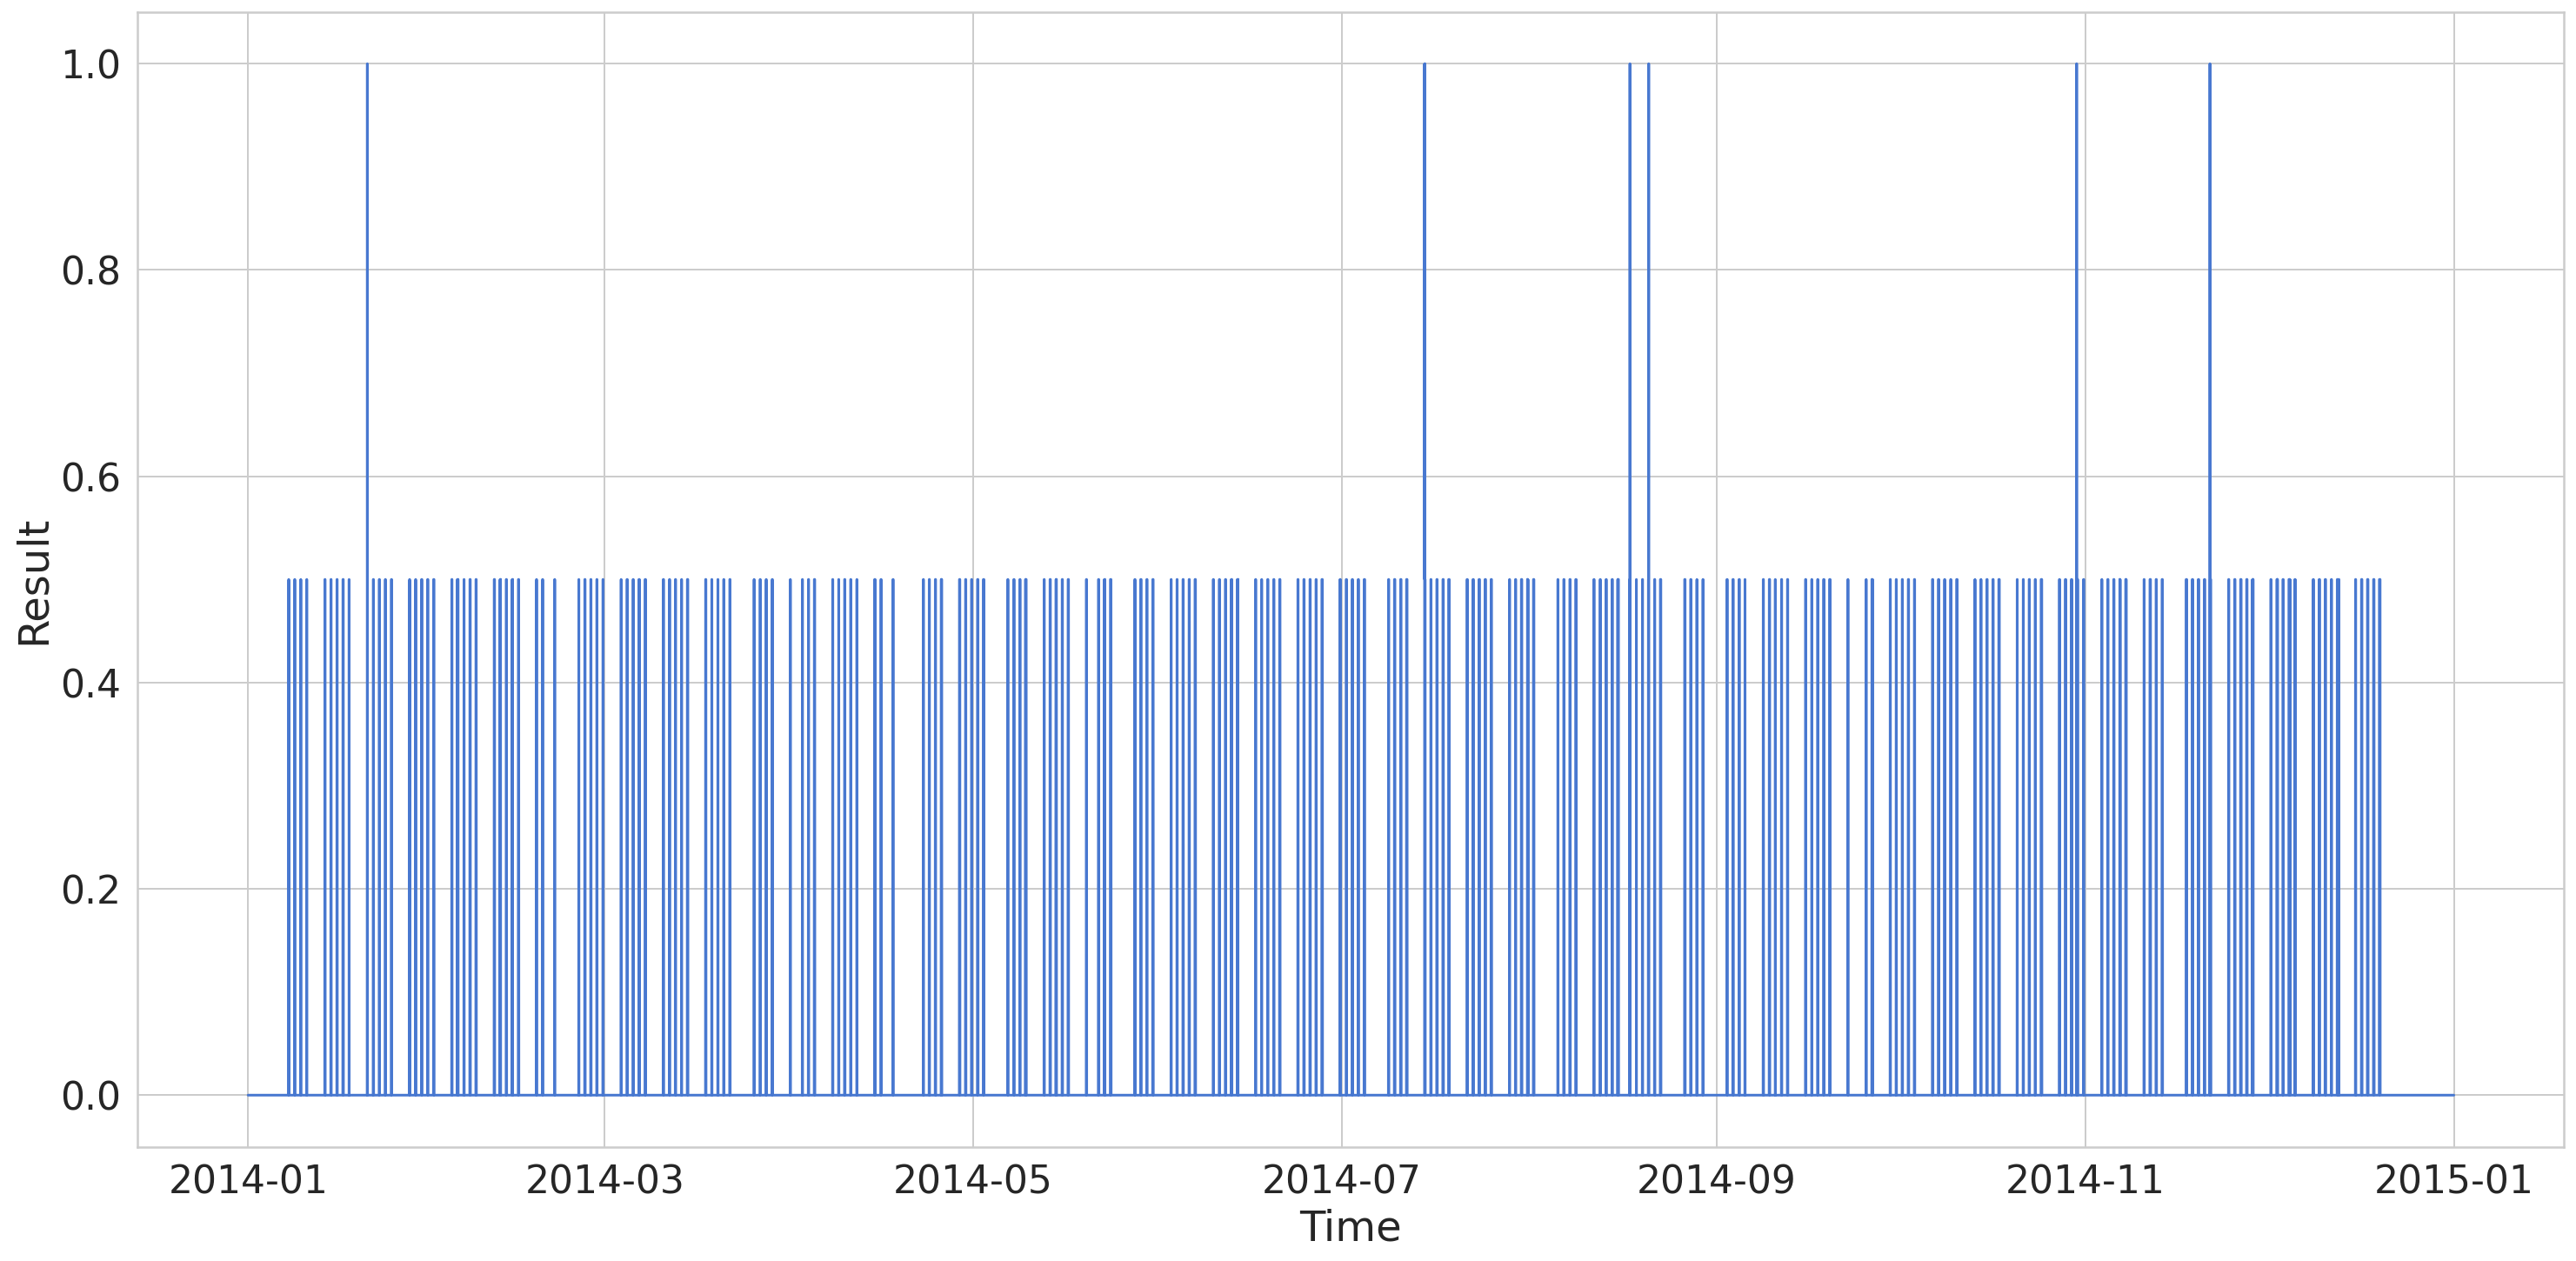

In [163]:
sns.lineplot(x=df.index, y="Result", data=df)

In [165]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

28016 7005


Change a type of data column (from str to datatime)

In [138]:
df.dtypes

Local_Date                datetime64[ns]
Day_Type_ID                        int64
Total_Carriageway_Flow           float64
Speed_Value                      float64
Intencity                        float64
Volume                           float64
Result                           float64
dtype: object

In [166]:
list(df)

['Day_Type_ID',
 'Total_Carriageway_Flow',
 'Speed_Value',
 'Intencity',
 'Volume',
 'Result',
 'hour',
 'day_of_month',
 'day_of_week',
 'month']

In [0]:
df.rename(columns={' Day Type ID': 'Day_Type_ID', ' Total Carriageway Flow': 'Total_Carriageway_Flow', ' Speed Value': 'Speed_Value'}, inplace=True)

In [167]:
df.columns.to_list()

['Day_Type_ID',
 'Total_Carriageway_Flow',
 'Speed_Value',
 'Intencity',
 'Volume',
 'Result',
 'hour',
 'day_of_month',
 'day_of_week',
 'month']

Scaling data

In [168]:
from sklearn.preprocessing import RobustScaler
f_cols1 = ['Total_Carriageway_Flow', 'Speed_Value', 'Intencity', 'Volume']

f_transformer1 = RobustScaler()
result_transformer = RobustScaler()

f_transformer1 = f_transformer1.fit(train[f_cols1].to_numpy())
result_transformer = result_transformer.fit(train[['Result']])

train.loc[:, f_cols1] = f_transformer1.transform(train[f_cols1].to_numpy())
train['Result'] = result_transformer.transform(train[['Result']])

test.loc[:, f_cols1] = f_transformer1.transform(test[f_cols1].to_numpy())
test['Result'] = result_transformer.transform(test[['Result']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [140]:
df.head()

Local_Date  Day_Type_ID  ...    Volume  Result
0 2014-01-01 00:00:00           14  ...  1.593474     0.0
1 2014-01-01 00:15:00           14  ...  2.285493     0.0
2 2014-01-01 00:30:00           14  ...  3.201297     0.0
3 2014-01-01 00:45:00           14  ...  5.135107     0.0
4 2014-01-01 01:00:00           14  ...  6.073404     0.0

[5 rows x 7 columns]

In [0]:
def create_dataset(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        Ys.append(Y.iloc[i + time_steps])
    return np.array(Xs), np.array(Ys)

In [0]:
TIME_STEPS = 24
x_train, y_train = create_dataset(train, train.Result, time_steps = TIME_STEPS)
x_test, y_test = create_dataset(test, test.Result, time_steps = TIME_STEPS)

In [171]:
print(x_train.shape, y_train.shape)

(27992, 24, 10) (27992,)


Creation of Neural Network model (LSTM)

In [0]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(x_train.shape[1], x_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

Training LSTM model

In [173]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

epochs_value = 300
batch_size_value = 32

early_stop = EarlyStopping(monitor='val_acc', 
                           min_delta=0.001,
                           patience=10, 
                           verbose=1, 
                           mode='auto')
check_point = ModelCheckpoint(filepath='drive/My Drive/', 
                        monitor='val_loss', 
                        verbose=1, 
                        save_best_only=True, 
                        mode='auto')

callbacks = [early_stop, check_point]

history = model.fit(
    x_train, y_train, 
    epochs=epochs_value, 
    batch_size=batch_size_value, 
    validation_split=0.1,
    shuffle=True
)



Epoch 1/300

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

788/788 [==============================] - 5s 7ms/step - loss: 0.0207 - val_loss: 0.0031
Epoch 2/300
788/788 [==============================] - 5s 6ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 3/300
788/788 [==============================] - 5s 6ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 4/300
788/788 [==============================] - 5s 6ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 5/300
788/788 [==============================] - 5s 6ms/step - loss: 0.0030 - val_loss: 0.0021
Epo

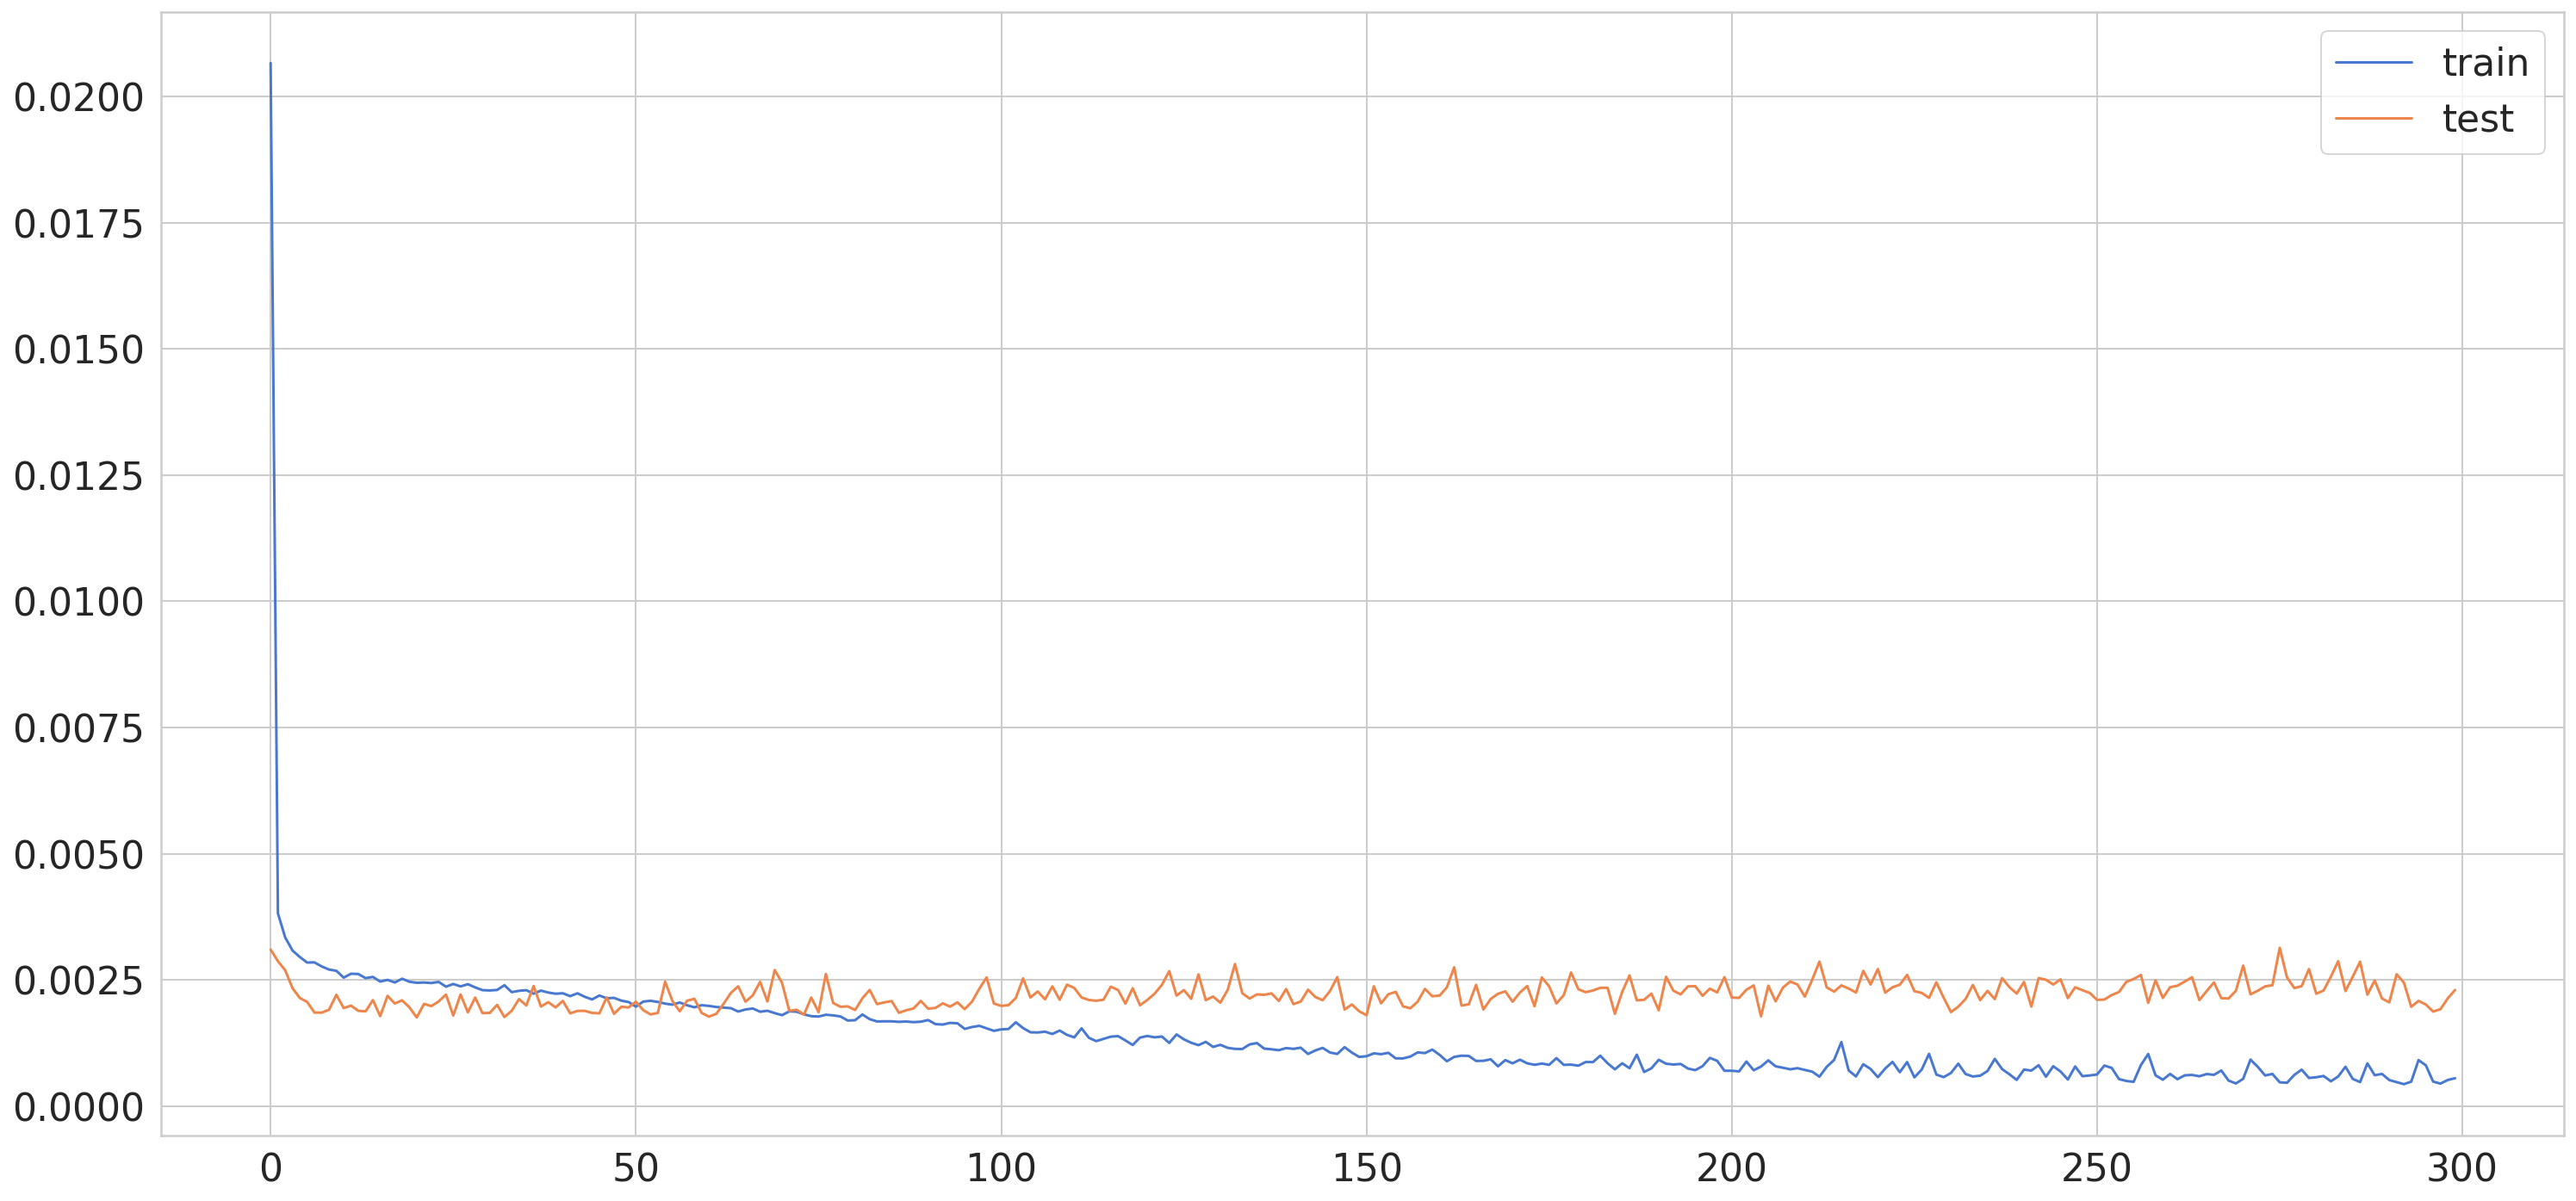

In [174]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [0]:
y_pred = model.predict(x_test)

In [0]:
y_train_inv = result_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = result_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = result_transformer.inverse_transform(y_pred)

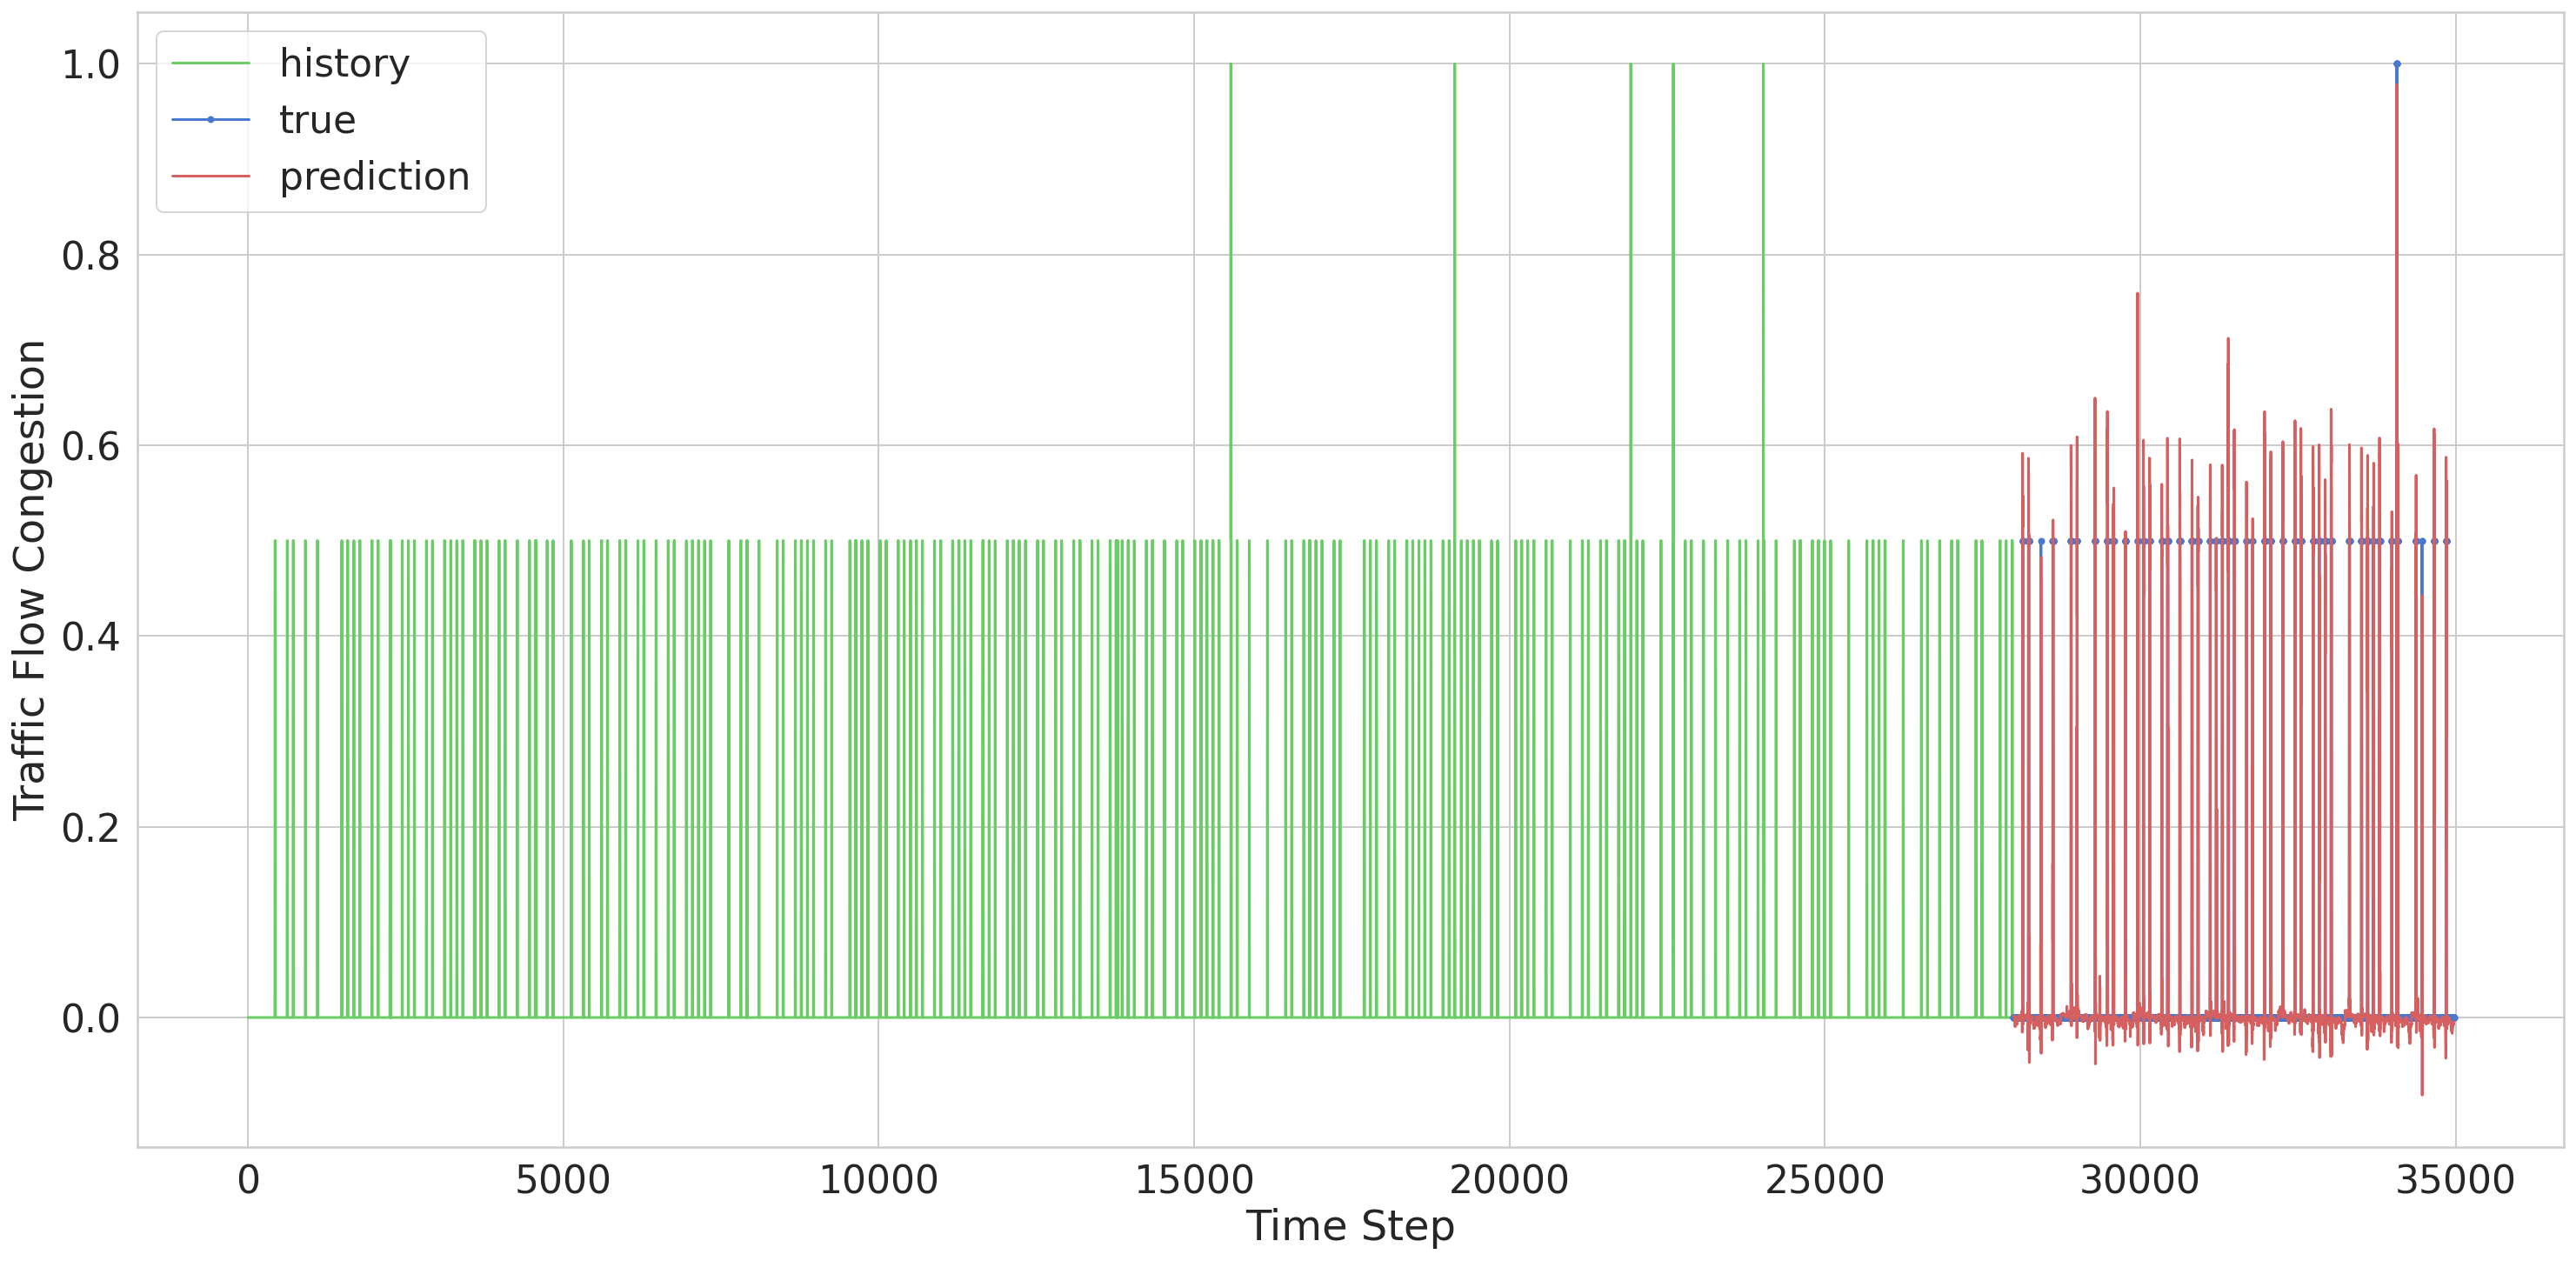

In [179]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Traffic Flow Congestion')
plt.xlabel('Time Step')
plt.legend()
plt.show();

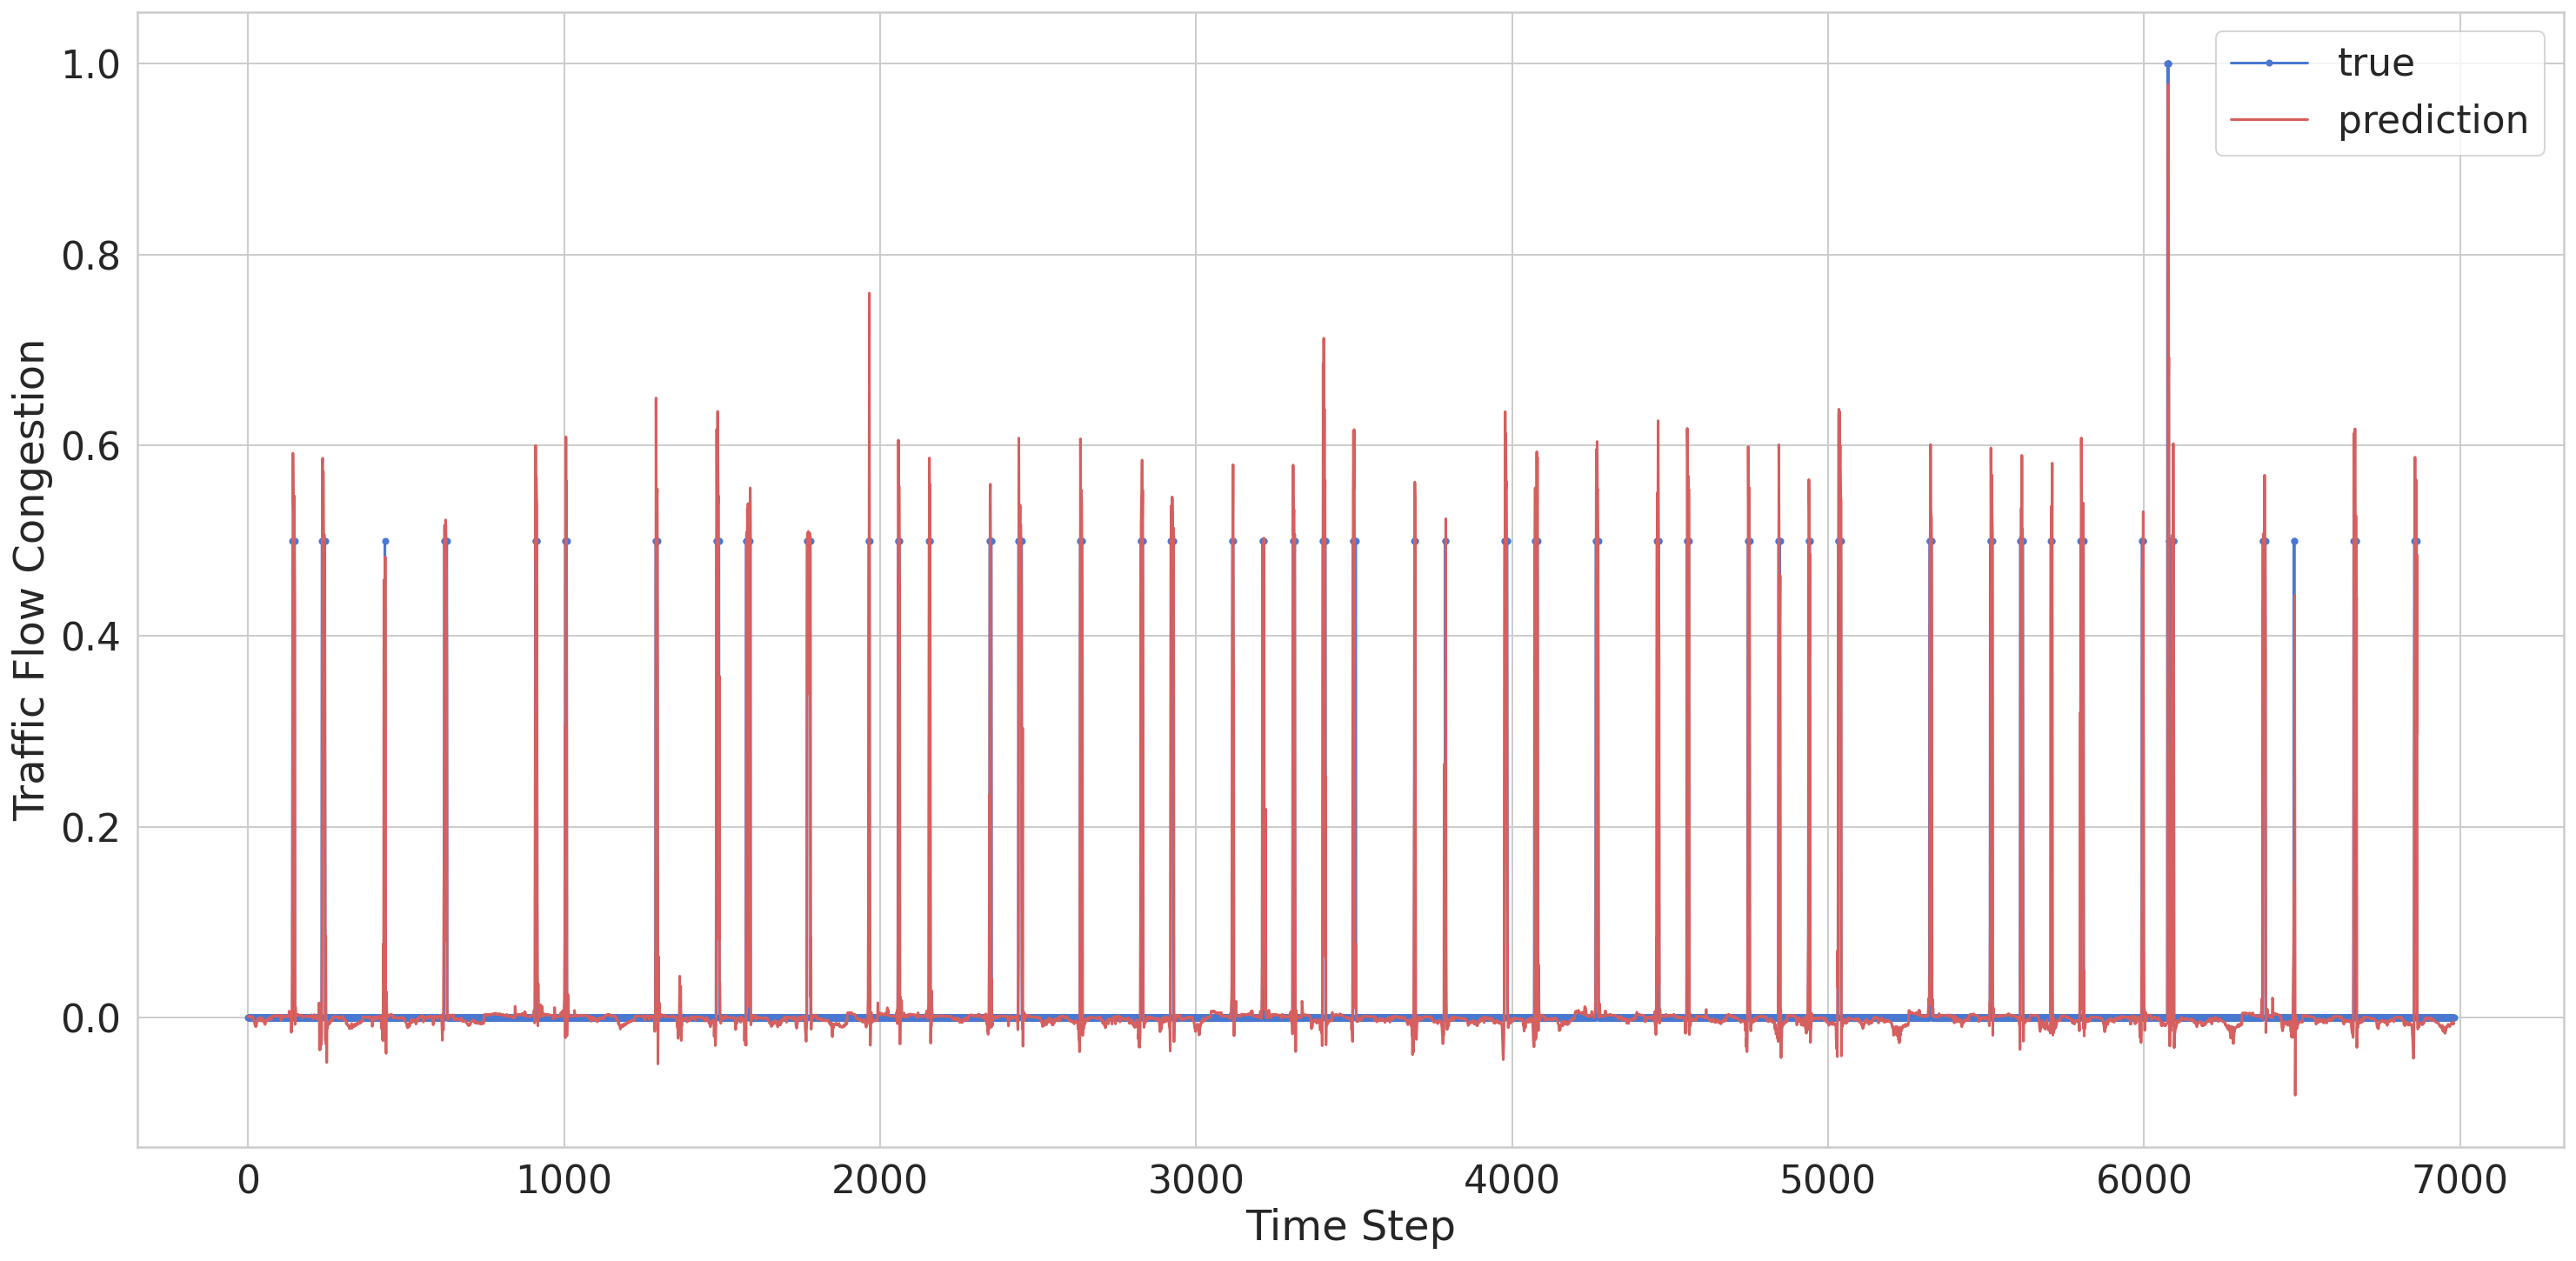

In [180]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Traffic Flow Congestion')
plt.xlabel('Time Step')
plt.legend()
plt.show();